In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

Path('single_preprocessors').mkdir(parents=True, exist_ok=True)

In [5]:
df = pd.DataFrame(
    [
        ['v2.8.0', '16G', 'area_statistics', '0:01:22.751035'],
        ['v2.8.0', '16G', 'climate_statistics', '0:00:53.552112'],
        ['v2.8.0', '16G', 'regrid', '0:00:54.988726'],
        ['v2.8.0', '16G', 'extract_levels', '0:29:09.263521'],
        ['v2.8.0', '16G', 'amplitude', '0:00:58.242961'],
        ['v2.8.0', '256G', 'area_statistics', '0:01:13.376243'],
        ['v2.8.0', '256G', 'climate_statistics', '0:00:53.622866'],
        ['v2.8.0', '256G', 'regrid', '0:00:54.278396'],
        ['v2.8.0', '256G', 'extract_levels', '0:27:08.828873'],
        ['v2.8.0', '256G', 'amplitude', '0:00:57.498253'],
        ['v2.11.0', '256G (default scheduler)', 'area_statistics', '0:01:19.318963'],
        ['v2.11.0', '256G (default scheduler)', 'climate_statistics', '0:00:54.899751'],
        ['v2.11.0', '256G (default scheduler)', 'regrid', '0:00:55.613680'],
        ['v2.11.0', '256G (default scheduler)', 'extract_levels', '0:10:47.902530'],
        ['v2.11.0', '256G (default scheduler)', 'amplitude', '0:00:55.459160'],
        ['v2.11.0', '16G (distributed scheduler)', 'area_statistics', '0:00:45.104335'],
        ['v2.11.0', '16G (distributed scheduler)', 'climate_statistics', '0:00:49.634153'],
        ['v2.11.0', '16G (distributed scheduler)', 'regrid', '0:00:43.001152'],
        ['v2.11.0', '16G (distributed scheduler)', 'extract_levels', '0:05:00.412077'],
        ['v2.11.0', '16G (distributed scheduler)', 'amplitude', '0:00:44.371469'],
        ['v2.11.0', '256G (distributed scheduler)', 'area_statistics', '0:00:35.496917'],
        ['v2.11.0', '256G (distributed scheduler)', 'climate_statistics', '0:00:33.596207'],
        ['v2.11.0', '256G (distributed scheduler)', 'regrid', '0:00:33.157242'],
        ['v2.11.0', '256G (distributed scheduler)', 'extract_levels', '0:01:23.014040'],
        ['v2.11.0', '256G (distributed scheduler)', 'amplitude', '0:00:32.666298'],
    ],
    columns=['version', 'setup', 'preprocessor', 'total_clocktime'],
)
df['tag'] = df.agg(lambda row: f"{row['version']} ({row['setup']})", axis=1)
df['total_clocktime'] = pd.to_timedelta(df['total_clocktime'])
df['total_runtime'] = df['total_clocktime'].dt.total_seconds()
df['runtime'] = df['total_runtime'] / 10.0
df

,version,setup,preprocessor,total_clocktime,tag,total_runtime,runtime
0,v2.8.0,16G,area_statistics,0 days 00:01:22.751035,v2.8.0 (16G),82.751035,8.275104
1,v2.8.0,16G,climate_statistics,0 days 00:00:53.552112,v2.8.0 (16G),53.552112,5.355211
2,v2.8.0,16G,regrid,0 days 00:00:54.988726,v2.8.0 (16G),54.988726,5.498873
3,v2.8.0,16G,extract_levels,0 days 00:29:09.263521,v2.8.0 (16G),1749.263521,174.926352
4,v2.8.0,16G,amplitude,0 days 00:00:58.242961,v2.8.0 (16G),58.242961,5.824296
5,v2.8.0,256G,area_statistics,0 days 00:01:13.376243,v2.8.0 (256G),73.376243,7.337624
6,v2.8.0,256G,climate_statistics,0 days 00:00:53.622866,v2.8.0 (256G),53.622866,5.362287
7,v2.8.0,256G,regrid,0 days 00:00:54.278396,v2.8.0 (256G),54.278396,5.427840
8,v2.8.0,256G,extract_levels,0 days 00:27:08.828873,v2.8.0 (256G),1628.828873,162.882887
9,v2.8.0,256G,amplitude,0 days 00:00:57.498253,v2.8.0 (256G),57.498253,5.749825


In [36]:
PALETTE = [
    'lightcoral',
    'firebrick',
    'darkorange',
    'lightsteelblue',
    'royalblue',
]

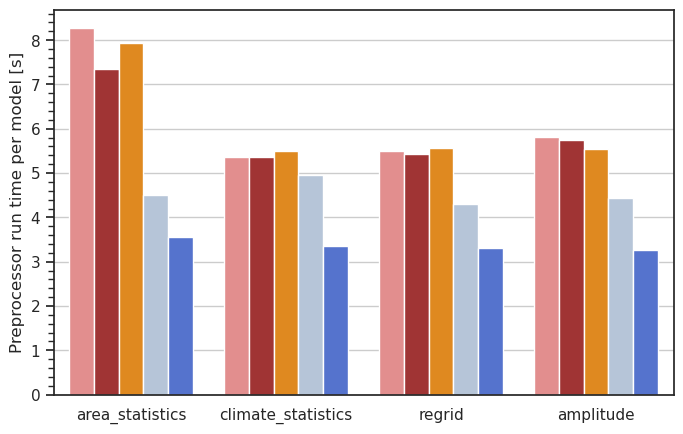

In [37]:
# All except extract_levels
sns.set_theme(
    style='ticks',
    rc={
        'axes.grid': True,
        'figure.figsize':(8, 5),
        'xtick.bottom': False,
        'ytick.minor.visible': True,
    },
)

df1 = df[df['preprocessor'] != 'extract_levels']

ax = sns.barplot(df1, x='preprocessor', y='runtime', hue='tag', legend=False, palette=PALETTE)
ax.set_ylabel('Preprocessor run time per model [s]')
ax.set_xlabel(None)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='y', which='minor', left=True)

plt.savefig(
    'other_preprocessors.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight',
)

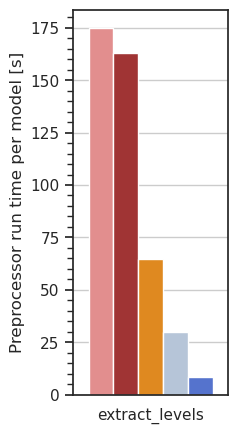

In [38]:
# extract_levels
sns.set_theme(
    style='ticks',
    rc={
        'axes.grid': True,
        'figure.figsize':(2, 5),
        'xtick.bottom': False,
        'ytick.minor.visible': True,
    },
)

df2 = df[df['preprocessor'] == 'extract_levels']

ax = sns.barplot(df2, x='preprocessor', y='runtime', hue='tag', legend=False, palette=PALETTE)
ax.set_ylabel('Preprocessor run time per model [s]')
ax.set_xlabel(None)

plt.savefig(
    'extract_levels.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight',
)

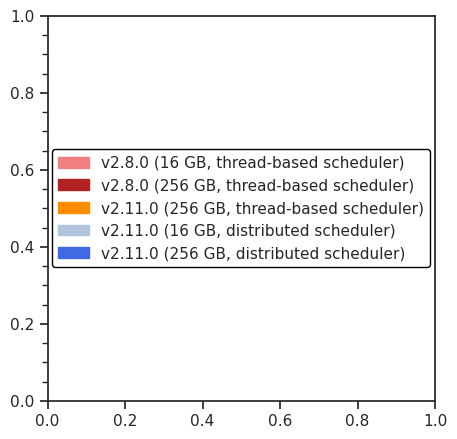

In [40]:
# legend
sns.set_theme(
    style='ticks',
    rc={
        'axes.grid': False,
        'figure.figsize':(5, 5),
    },
)

patches = [
    mpatches.Patch(color=PALETTE[0], label='v2.8.0 (16 GB, thread-based scheduler)'),
    mpatches.Patch(color=PALETTE[1], label='v2.8.0 (256 GB, thread-based scheduler)'),
    mpatches.Patch(color=PALETTE[2], label='v2.11.0 (256 GB, thread-based scheduler)'),
    mpatches.Patch(color=PALETTE[3], label='v2.11.0 (16 GB, distributed scheduler)'),
    mpatches.Patch(color=PALETTE[4], label='v2.11.0 (256 GB, distributed scheduler)'),
]
legend = plt.legend(handles=patches, loc='center', edgecolor="black")
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.0))

plt.savefig(
    'legend.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)